## install

In [ ]:
conda install -c plotly chart-studio 

conda install -c conda-forge cufflinks-py


## import

In [4]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()


## basics

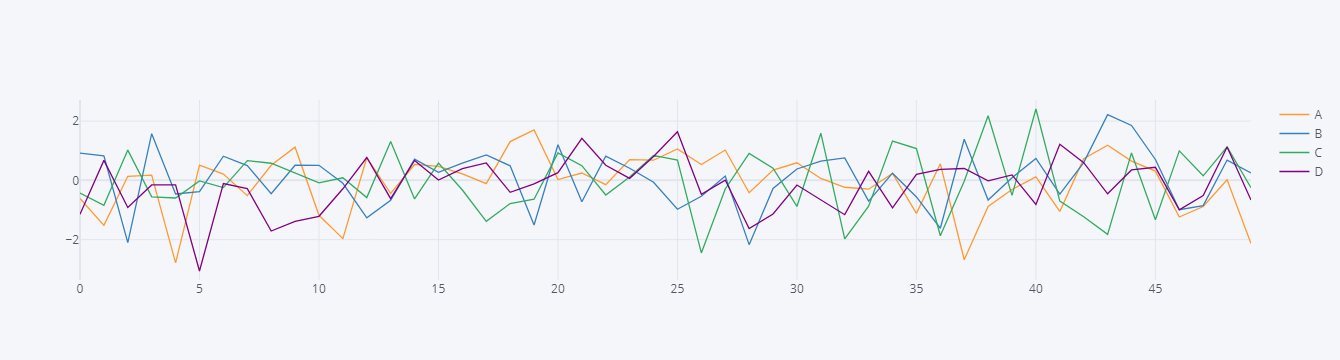

In [26]:
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])
df_1.head()
df_1.iplot()

## line plots

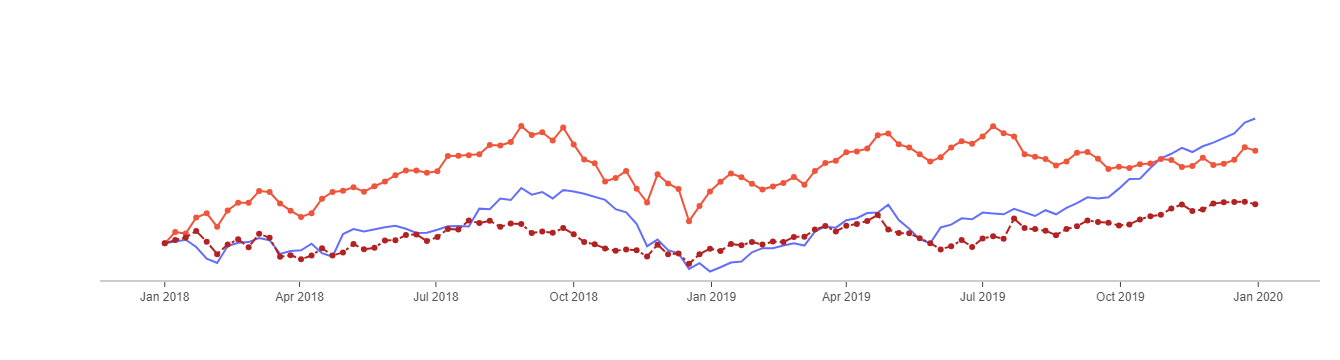

In [27]:
import plotly.graph_objects as go

df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Date', 'y':'Price'})

px.line(df_stocks, x='date', y=['GOOG', 'AAPL'],
        labels={'x':'Date', 'y':'Price'}, title='Apple vs Google')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL,
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN,
                        mode='lines+markers', name='Amazon'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG,
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2,
                                 dash='dashdot')))

#fig.update_layout(title='Stock Price Data 2018 - 2020',
#                 xaxis_title='Price', yaxis_title='Date')

fig.update_layout(
    xaxis=dict(
        showline=True, showgrid=False, showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2, ticks='outside', tickfont=dict(
            family='Arial', size=12, color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False, zeroline=False, showline=False,
        showticklabels=False),
    autosize=False,
    margin=dict(
        autoexpand=False, l=100, r=20, t=110, 
    ),
    showlegend=False, plot_bgcolor='white'
)

## bar charts

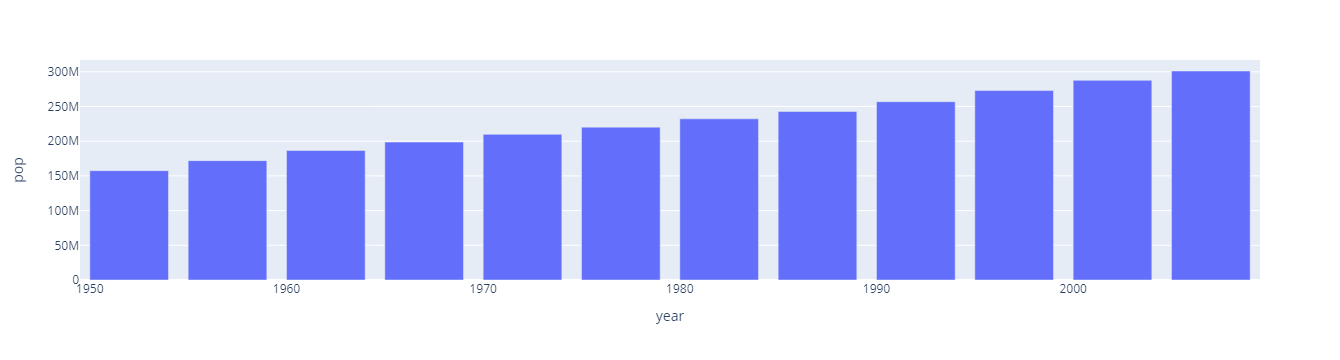

In [28]:
df_us = px.data.gapminder().query("country == 'United States'")
px.bar(df_us, x='year', y='pop')


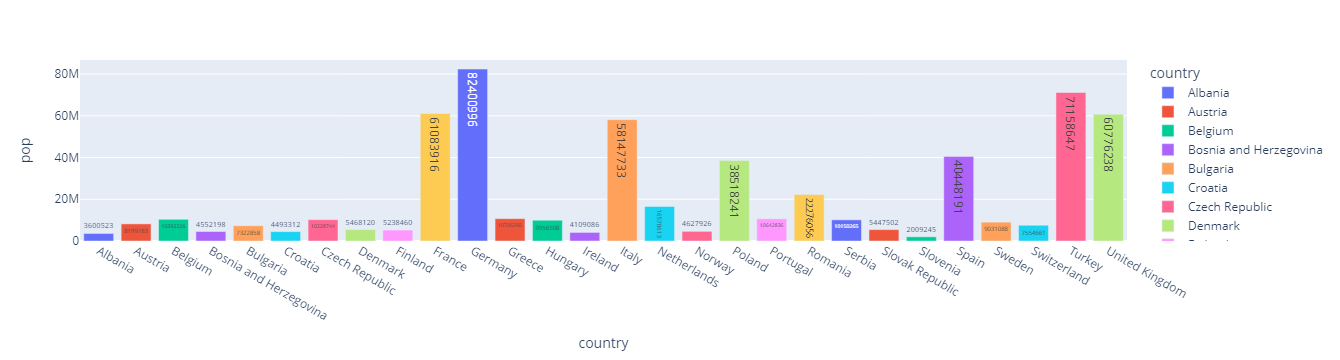

In [37]:

df_tips = px.data.tips()
px.bar(df_tips, x='day', y='tip', color='sex',
      title='Tips by Gender Each Day',
      labels={'tip':'Tip Amount', 'day':'Day of the Week'})

px.bar(df_tips, x='sex', y='total_bill', color='smoker',
       barmode='group')

df_europe = px.data.gapminder().query("continent == 'Europe' and year == 2007 and pop > 2.e6")
fig = px.bar(df_europe, x='country', y='pop', text='pop', color='country')
fig

#df_europe.head()
